In [ ]:
import json


In [ ]:
file_path = "/Users/k.abhishek/Documents/customer_clusters/result_match_tax_bvd_name_country-1-2-3-4-5.json"
with open(file_path, "r") as f:
    data = json.load(f)

scores = []
predicted_labels = []
false_postives = {}
#matched_label 
for key, value in data.items():
    input_customer = eval(key)
    top_match = value['1'][0]
    if type(top_match) == dict:
        matched_customer_info = top_match['customer_info']
        #check if they belong to the same cluster_legal_id
        scores.append(top_match['score'])
        predicted_labels.append(input_customer[1] == matched_customer_info[1])
        if input_customer[1] != matched_customer_info[1]:
            false_postives[key] = value

In [ ]:
save_file_path = "/Users/k.abhishek/Documents/customer_clusters/result_match_tax_bvd_name_country-1-2-3-4-5_false_positives.json"
with open(save_file_path, "w") as f:
    json.dump(false_postives, f)

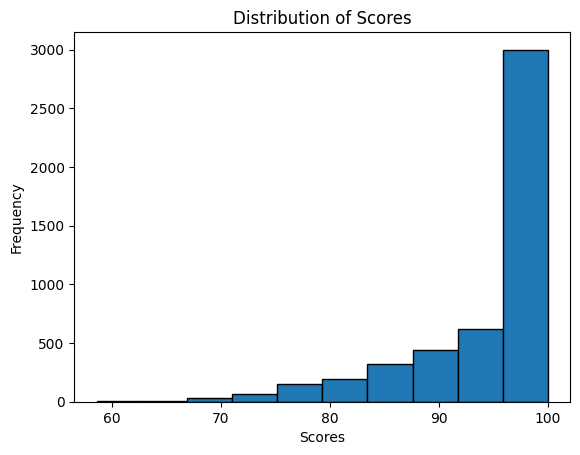

In [27]:
import matplotlib.pyplot as plt
scores = [score for score, label in zip(scores, predicted_labels) if label]
plt.hist(scores, bins=10, edgecolor='black')
# Add titles and labels
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
# Show the plot
plt.show()


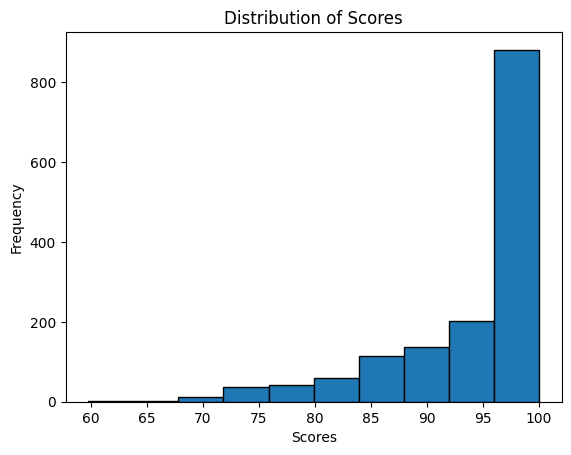

In [28]:
scores = [score for score, label in zip(scores, predicted_labels) if not label]
plt.hist(scores, bins=10, edgecolor='black')
# Add titles and labels
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
# Show the plot
plt.show()